# Limitaciones del computador

Números en computador (aritmética de punto flotante):

$$ 1.234 = (-1)^n\cdot 1234 \cdot 10^{-3} $$

- Signo  (n, 0 o 1)
- Mantisa (1234)
- Base (10)
- Exponente (-3)

(en la práctica es todo en base 2: $(-1)^n\cdot 0110\cdot  2^{l}$)

In [4]:
a = 2.0
print(type(a))
print("{:.3f}".format(1/3))
print("{:.7f}".format(1/3))
print("{:.12f}".format(1/3))
print("{:.16f}".format(1/3))
print("{:.20f}".format(1/3))
print("{:.50f}".format(1/3))

<class 'float'>
0.333
0.3333333
0.333333333333
0.3333333333333333
0.33333333333333331483
0.33333333333333331482961625624739099293947219848633


# Aproximación matemática

Fórmula de Taylor para aproximar funciones

$$ f(x) = f(x_0) + f'(x_0)(x - x_0) + \frac{ f^2(x_0) }{2!}(x-x_0)^2 + \cdot\cdot\cdot + \frac{f^{(k)}(x_0)}{k!}(x-x_0)^k + O((x-x_0)^{k+1}) $$

donde el error es de la forma

$$ e_{k+1} =  \frac{f^{(k+1)}(\xi)}{(k+1)!}(x-x_0)^{k+1} $$

$$ f(x) = f(x_0) + f'(x_0)(x - x_0) + \frac{ f'(x_0) }{2!}(x-x_0)^2 + \cdot\cdot\cdot + \frac{f^(k)(x_0)}{k!}(x-x_0)^k + O((x-x_0)^{k+1}) $$

- Aproximar función ($h=x-x_0$):

$$ f(x) = f(x_0) + f'(x_0)(x-x_0) + O(h^2) $$

- Aproximar derivada:

$$ \frac{f(x) - f(x_0)}{x - x_0} = f'(x_0) + O(h) $$

In [5]:
import numpy as np
import scipy as sp
from math import factorial
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

def df(x):
    return np.cos(x)

def dfk(x,k):
    res = k%4
    if res == 0:
        return f(x)
    elif res == 1:
        return df(x)
    elif res == 2:
        return -np.sin(x)
    else:
        return -np.cos(x) 

def f_Taylor(x, x0, k):
    out = f(x0)
    h = x-x0
    for j in range(k):
        out += dfk(x0, j+1) / factorial(j+1) * h**(j+1)
    return out

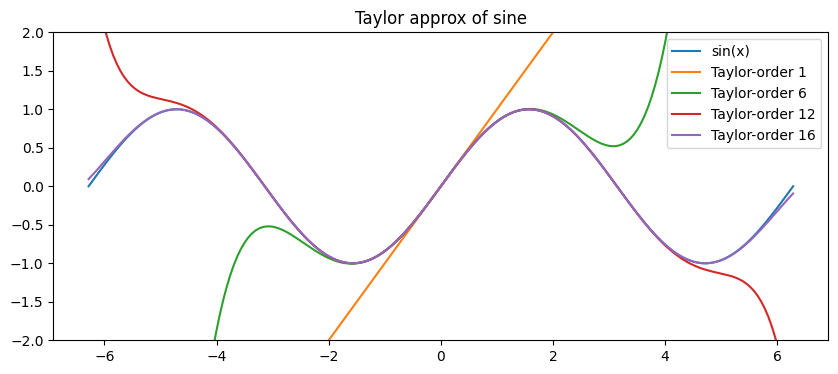

In [6]:
xs = np.linspace(-2*np.pi,2*np.pi,200)
fs = f(xs)  # [ f(x) for x in xs ]

plt.figure(figsize=(10, 4))
plt.plot(xs,fs,label="sin(x)")
for k in (1,6,12,16):
    fs_taylor = f_Taylor(xs, 0.0, k)
    plt.plot(xs,fs_taylor,label="Taylor-order {}".format(k))
    plt.ylim(-2,2)
    plt.legend() 
plt.title("Taylor approx of sine".format(k)); plt.show()

# Orden de convergencia

Recordemos que 

- Aproximar función ($h=x-x_0$):

$$ f(x) = f(x_0) + f'(x_0)(x-x_0) + O(h^2) $$

- Aproximar derivada:

$$ \frac{f(x) - f(x_0)}{x - x_0} = f'(x_0) + O(h) $$

Orden de convergencia es el exponente en $O(h^k)$

In [7]:
def f_approx(x, h):
    return f(x) + df(x) * h

errors_f=[]
errors_df = []
errors_df2 = []
hs = [10**k for k in range(1, -12, -1)]
x = 0.1
for h in hs:
    error_f = abs(f(x+h) - f_approx(x, h)) # Aproximación de función
    errors_f.append(error_f)
    error_df = abs( (f(x+h) - f(x))/(h) - df(x) ) # Aproximación de derivada
    errors_df.append(error_df)
    error_df2 = abs( (f(x+h) - f(x-h))/(2*h) - df(x) ) # Aproximación de derivada
    errors_df2.append(error_df2)

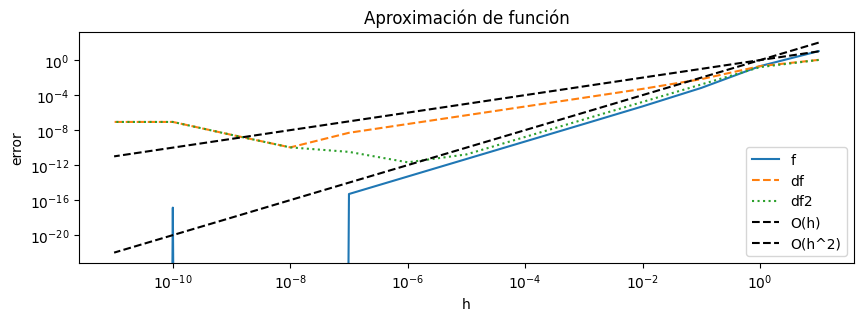

In [8]:
plt.figure(figsize=(10, 3))
plt.loglog(hs, errors_f, label = "f")
plt.loglog(hs, errors_df, linestyle='dashed', label="df")
plt.loglog(hs, errors_df2, linestyle='dotted', label="df2")
plt.loglog(hs, hs, linestyle='dashed', label='O(h)', color='black')
plt.loglog(hs, [h**2 for h in hs], linestyle='dashed', label='O(h^2)', color='black')
plt.legend()
plt.title("Aproximación de función")
plt.xlabel("h")
plt.ylabel("error")
plt.show()

# Diferencias finitas

Para derivadas de segundo orden: 

$$ 
\begin{aligned} 
f''(x) &\approx 1/h\left(f'(x+h) - f'(x)\right) \\
       &\approx 1/h \left( \frac{1}{h}\left(f(x+h)-f(x)\right) - \frac{1}{h}\left(f(x) - f(x-h)\right)\right)
\end{aligned}
$$

Luego
 
 - Primera derivada:

$$ f'(x) \approx \frac 1 h \left[ f(x+h) - f(x) \right] \qquad \text{(Diferencias hacia adelante)}$$
$$ f'(x) \approx \frac 1 h \left[ f(x) - f(x-h) \right] \qquad\text{(Diferencias hacia atrás)}$$
$$ f'(x) \approx \frac 1 {2h} \left[ f(x+h) - f(x-h) \right] \qquad\text{(Diferencias centradas)}$$

 - Segunda derivada:

$$ f''(x) \approx  \frac{1}{h^2} \left[ f(x+h)-2f(x)+ f(x-h)\right] $$

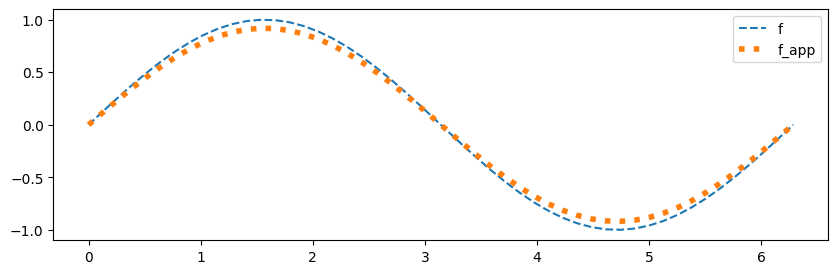

In [9]:
def f(x): 
    return np.sin(x)
def df2_approx(x,h):
    return 1/h**2 * (f(x+h) - 2 * f(x) + f(x-h) )

h = 1.0
xs = np.linspace(0,2*np.pi)
fs = f(xs)
fs_app = df2_approx(xs, h)
plt.figure(figsize=(10, 3))
plt.plot(xs, fs, linestyle='dashed', label="f")
plt.plot(xs,-fs_app, linestyle='dotted', linewidth=4, label="f_app")
plt.legend()
plt.show()

## Discretización y representación matricial

Forma simple de aproximar una función:

- Considerar intervalo $I=(a,b)$
- Considerar un conjunto de puntos en el intervalo $\{x_n\}_{n=1}^N$  (malla)
- Por simplicidad, $x_{i+1} - x_i = h > 0$
- Considerar el vector de malla $\vec f_N$ dado por:

$$ \vec f_N = (f(x_1), f(x_2), \cdot\cdot\cdot, f(x_N)) $$

- El operador derivada $f\mapsto Df$ es lineal. Buscamos algo similar con matrices.

Asumamos diferencias hacia adelante:
$$ f'(x) \approx \frac 1 h (f(x+h) - f(x)) $$

- En cada punto de malla tenemos derivada:

$$ f'(x_i) \approx \frac 1 h (f(x+h) - f(x)) = \frac 1 h (f(x_{i+1}) - f(x_i)) $$

- Esto es un operador lineal en cada punto:

$$ \frac 1 h (f(x_{i+1}) - f(x_i)) = [0 \quad 0 \cdot\cdot\cdot  -1/h \quad 1/h \cdot\cdot\cdot 0 \quad 0] \vec f $$

- Esto induce una matriz


Matrix de diferencias hacia adelante:
$$ \begin{bmatrix} f'(x_1) \\ f'(x_2) \\ \vdots \\ f'(x_{N-1}) \\ f'(x_N) \end{bmatrix} = \begin{bmatrix} -1/h & 1/h  & 0   & \dots & 0 \\ 
                  0  & -1/h & 1/h & 0 \dots & 0 \\
                  \vdots & \vdots & & & \\
                  0 & \dots & 0 -1/h & 1/h \\
                  0 & \dots & 0 -1/h & 1/h \\\end{bmatrix}\vec f = \mathbf{D_h} \vec f $$

- Última fila usa diferencias hacia atrás (no existe $x_{N+1}$)
- Matriz es singular ya que si $\mathbb{1} = (1,1,\dots,1)$, $\mathbf{D_h} \mathbb{1} =\vec 0$
- Este kernel es el mismo que el de la derivada como operador!

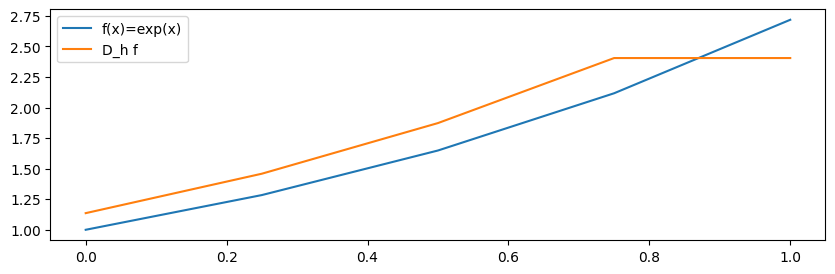

In [10]:
Nints = 4 # Número de intervalos
Npts = Nints+1 # Número de puntos
h = 1.0/Nints

xs = np.linspace(0,1,Npts)
Dh = np.zeros((Npts, Npts))
for i in range(Npts-1):
        Dh[i,i], Dh[i,i+1] = -1/h, 1/h

Dh[-1,-2] = -1/h
Dh[-1,-1] = 1/h
fs = np.exp(xs)
dfs = Dh @ fs
plt.figure(figsize=(10, 3))
plt.plot(xs, fs, label="f(x)=exp(x)")
plt.plot(xs, dfs, label="D_h f")
plt.legend()
plt.show()

# Ecuación de segundo orden

Encontrar $u:(0,1)\to \mathbb{R}$ tal que

$$ \begin{aligned}
    -a u''(x) + b u'(x) + c u(x) &= f(x) \\
    u(0) &= u_0 \\
    u(1) &= u_1
\end{aligned}$$

$$ \begin{aligned}
    -a u''(x) + b u'(x) + c u(x) &= f(x) \\
    u(0) &= u_0 \\
    u(1) &= u_1
\end{aligned}$$

Término a término: 

- $u(x_i) \approx [\vec u_h]_i $
- $u'(x_i) \approx [\mathbf{D}_{h} \vec u_h]_i $
- $u''(x_i) \approx [\mathbf{D}_{2,h} \vec u_h]_i $, con $\mathbf{D}_{2,h}$ una aproximación de la segunda derivada.

Forma discreta:

$$ \left(-a \mathbf{D}_{2,h} + b \mathbf D_h + c\mathbf I\right) \vec u_h = \vec f $$

*Faltan condiciones de borde*

**Condiciones de borde**:

- Condición $u(x_0) = u_0$ reemplaza primera ecuación:

$$ [\quad -1/h \quad 1/h \quad 0 \quad \dots \quad ]\, \vec u_h = f(x_0) \quad\Rightarrow\quad [\quad 1 \quad 0\quad\dots\quad 0 \quad ]\, \vec u_h = u_0 $$

- Condición $u(x_N) = u_1$ reemplaza última ecuación:

$$ [\quad 0 \quad \dots \quad -1/h \quad 1/h \quad ]\, \vec u_h = f(x_N) \quad\Rightarrow\quad [\quad 0 \quad\dots \quad 0\quad 1 \quad] \,\vec u_h = u_1 $$

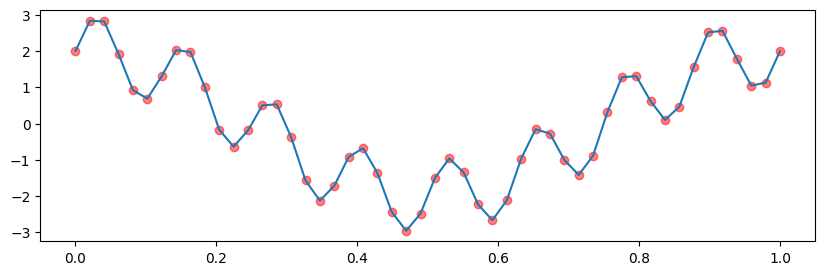

In [11]:
# parámetros de discretización
Nints = 50 # Número de intervalos
Npts = Nints # Número de puntos
h = 1.0/Nints
xs = np.linspace(0,1,Npts)

def u_analytic(x):
    return np.sin(16*np.pi*x) + 2.0 * np.cos(2*np.pi*x)

plt.figure(figsize=(10, 3))
plt.plot(xs, u_analytic(xs))
plt.scatter(xs, u_analytic(xs), color='red', alpha=0.5)
plt.show()

In [12]:
# parámetros físicos
a = b = c = 1

# Impongo condición de borde 
# dada por solución analítica
u0 = u_analytic(xs[0]) 
u1 = u_analytic(xs[-1])

# Creación de matrices
def getProblem(N):
    I = np.eye(N)
    Dh = np.zeros((N, N))
    D2h = np.zeros((N, N))
    
    # Sin extremos por BCs (filas 0 y Npts-1)
    for i in range(1,N-1):
            Dh[i,i], Dh[i,i+1]   = -1/h, 1/h
            D2h[i,i-1], D2h[i,i], D2h[i,i+1] =  1/h**2, -2/h**2, 1/h**2    
    # Matriz y lado derecho del problema
    D = -a * D2h + b*Dh + c*I
    xs = np.linspace(0,1,N)
    fh = D @ u_analytic(xs)
    
    # BCs
    D[0,:] = D[-1,:] = 0.0
    D[0,0] = D[-1,-1] = 1.0
    fh[0] = u0
    fh[-1] = u1
    return xs, D, fh

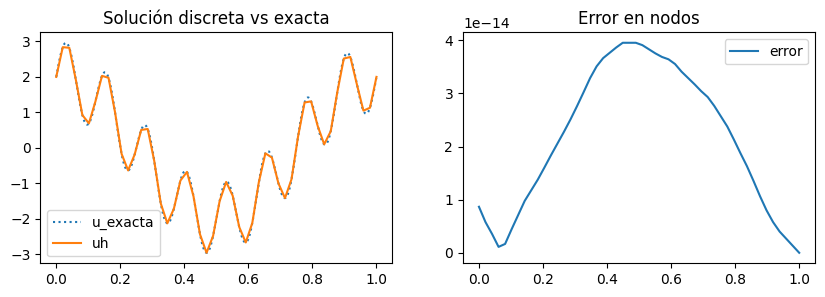

In [13]:
xs, D, fh = getProblem(Npts)
uh = np.linalg.solve(D, fh)

xs_fine = np.linspace(0,1,1000)
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.plot(xs_fine, u_analytic(xs_fine), linestyle='dotted', label="u_exacta")
plt.plot(xs, uh, label="uh")
plt.legend()
plt.title("Solución discreta vs exacta")
plt.subplot(122)
plt.title("Error en nodos")
plt.plot(xs, np.abs(uh - u_analytic(xs)), label="error")
plt.legend()
plt.show()

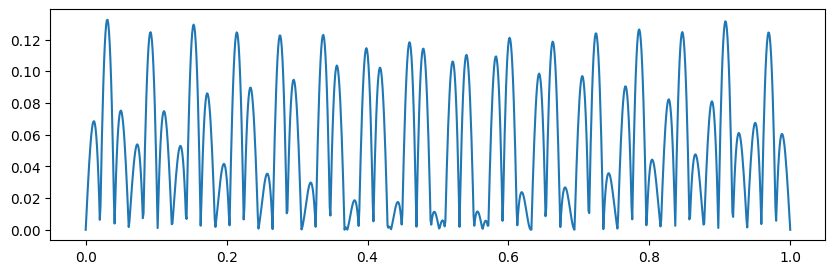

In [14]:
# Para revisar el error en todas partes, 
# hay que interpolar entre los puntos discretos

uh_fine = np.interp(xs_fine, xs, uh)
plt.figure(figsize=(10, 3))
plt.plot(xs_fine, np.abs(uh_fine - u_analytic(xs_fine)), label="error")
plt.show()

Qué hace `np.linalg.solve`?

- Calcula una factorización LU
- Esto requiere más memoria
- Complejidad cuadrática: Requiere "$N^2$" iteraciones

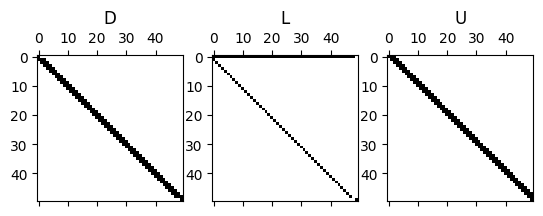

Non-zeros: L 98, U 147, D 146
Diference: 99


In [15]:
_, D, _ = getProblem(50)
L, U = sp.linalg.lu(D, permute_l=True)
plt.subplot(131)
plt.spy(D); plt.title("D")
plt.subplot(132)
plt.spy(L); plt.title("L")
plt.subplot(133)
plt.spy(U); plt.title("U")
plt.show()
nnz_L = np.count_nonzero(L) 
nnz_U = np.count_nonzero(U)
nnz_D = np.count_nonzero(D)
print("Non-zeros: L {}, U {}, D {}".format(nnz_L, nnz_U, nnz_D))
print("Diference:", nnz_L+nnz_U - nnz_D)

# Métodos iterativos

$$ Ax = b $$

` Idea: Encontrar solución hasta una precisión dada`

- Escribimos problema lineal con perturbación nula dada una matrix $P$ y constante $\omega$
$$ Ax = b \qquad\Rightarrow\qquad Px = Px + \omega(b - Ax) $$
- Generamos iteratión de punto fijo: Dado $x^k$, encontrar $x^{k+1}$ tal que
$$ Px^{k+1} = Px^k + \omega(b - Ax^k) \qquad \text{(Método de Richardson precondicionado)}$$
- Notamos que: 
    - Si $(x^k)_k$ converge, entonces converge a $x$ tal que $Ax = b$
    - Podemos usar Teorema de punto fijo de Banach para ver cuándo es convergente
      <div style="text-align: right"> (Toda contracción tiene un único punto fijo) </div>
      <div style="text-align: right"> (Contracción: $\| T(x)-T(y)\| < \|x - y\|$) </div>
    - Sistema es equivalente a usar $P=I$ en problema $P^{-1}Ax = P^{-1}b$.
    - A $P$ se le llama _precondicionador_
    - $P$ debe ser una matriz "parecida a $A$ pero fácil de invertir"

## Ejemplos simples de precondicionadores

- Jacobi: $ P = \text{diag}\,(A)$
- Gauss-Seidel: $P = \text{tril}\,(A)$
- Gauss-Seidel superior: $P = \text{triu}\,(A)$

Todas fáciles de invertir.

Ojo: **NUNCA SE CALCULA LA INVERSA DE UNA MATRIZ EN LA PRÁCTICA**

De ahora en adelante, $x = A^{-1}b$ _significa_ encontrar $x$ tal que

$$ Ax = b$$

## El algoritmo

1. Considerar un vector inicial $x^0$, el sistema $A,P,b$; una tolerancia $\texttt{tol}$ y un número máximo de iteraciones permitidas. 
2. En cada iteración $k$:
     1. Dado $x^k$, encontrar nuevo vector $x^{k+1}$ usando Richardson
     2. Calcular residuo k-ésimo $r^k = P^{-1}(b - Ax)$
     3. Calcular $\texttt{error} = \| r^k \|$
     4. Si el error es menor a la tolerancia o excedimos el máximo de iteraciones, terminar


In [34]:
def solveRichardson(A, b, P, omega, tol, maxit, verbose=False):
    x = b.copy()
    x[:] = 0.0 # Guess inicial
    it = 0
    residual = np.linalg.solve(P, b - A@x)
    error = np.linalg.norm(residual)
    if verbose: print(f"It {it:3}, err={error:1.2e}")
    while True:
        it += 1
        x = x + omega * residual # Nuevo vector
        residual = np.linalg.solve(P, b - A@x) # Residuo
        error = np.linalg.norm(residual) # Norma euclidiana
        if verbose: print(f"It {it:3}, err={error:1.2e}")
        if error < tol or it > maxit or error > 1e14:
            if error < tol:
                print(f"\tConverged in {it} iterations, error={error:1.2e}")
            else:
                print("\tDiverged")
            return x, it
            

In [1]:
N = 20
omega = 1.0
tol = 1e-6
maxit = 1000
verbose = True

_, A, b = getProblem(N) # Usamos matriz de diferencias finitas (invertible)

P_id = np.eye(N)
P_jacobi = np.zeros((N,N))
P_gs = np.zeros((N,N))
for i in range(N):
    P_jacobi[i,i] = A[i,i] # Jacobi
    for j in range(i+1):
        P_gs[i,j] = A[i,j]

x_id, _ = solveRichardson(A, b, P_id, omega, tol, maxit, verbose)
x_jacobi, _ = solveRichardson(A, b, P_jacobi, omega, tol, maxit, verbose)
x_gs, _ = solveRichardson(A, b, P_gs, omega, tol, maxit, verbose)

# Verificamos soluciones
print("Error id:", np.linalg.norm(b - A@x_id))
print("Error Jacobi:", np.linalg.norm(b - A@x_jacobi))
print("Error Gauss-Seidel:", np.linalg.norm(b - A@x_gs))

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


NameError: name 'getProblem' is not defined

# Por qué convergen? 

## Análisis del error

- Defino $\hat b = P^{-1}b$, luego estudiamos iteración
$$ x^{k+1} = x^k + \omega(\hat b - P^{-1}Ax^k) = x^k + \omega \underbrace{r_k}_\text{residuo $k$} $$
- Defino error $e^{k+1} = x^{k+1} - x^k$, luego ecuación del error:
$$ e^{k+1} = e^k - \omega P^{-1}Ae^k = (I - \omega P^{-1}A)e^k $$
- Defino operador de punto fijo $T:\mathbb R^n \to \mathbb R^n$ dado por solución:
$$ x^{k+1} = T(x^k) $$
Forma explícita: $x^{k+1} = \omega \hat b + (I - \omega P^{-1}A)x^k$
- Buscamos acotar error actual en términos del error anterior

## Nota sobre normas de matrices para ecuación del error

- Definimos la _norma de operador_ de una matriz como   (con $|\cdot|$ norma euclidiana)
$$ \|A\|_{2,2} = \sup_x \frac{|Ax|_2}{|x|_2} $$
- Por definición obtenemos que
$$ |Ax| \leq \|A\|_{2,2} |x| $$
- Se puede mostrar que $\|A\|_{2,2}$ es el mayor valor singular de $A$:
$$ \|A\|_{2,2} = \sigma_\text{max}(A) $$
- Esta es una norma _diferente_ (pero equivalente) a la estándar (norma de Frobenius)
$$ |A|_2^2 = \sum_{i,j} A_{ij}^2 $$

## Vuelta al error

- Tomamos ecuación del error
$$ e^{k+1} = (I - \omega P^{-1}A)e^k =: B_\omega e^k $$
- Tomamos norma euclidiana y luego acotamos por norma de operador:
$$ |e^{k+1}|_2=|B_\omega e^k|_2 \leq \|B_\omega\|_{2,2}|e^k|_2 $$
- Si $\|B_\omega\|_{2,2}<1$, luego el operador solución es una contracción
- Por Teorema de punto fijo de Banach, si $\|B_\omega\|_{2,2}<1$, la sucesión converge.

## Recap hasta ahora

- Consideramos iteración de Richardson (precondicionado)
$$ x^{k+1} = x^k + \omega (b - P^{-1}Ax^k) $$
- Escribimos ecuación del error $e^k = x^k - x^{k-1}$:
$$ e^{k+1} = \underbrace{(I - \omega P^{-1}A)}_{B_\omega} e^k $$
- Usamos teoría de punto fijo para concluir que si $\|B_\omega\|_{2,2}<1$, la sucesión converge

In [44]:
I = np.eye(N)
B_id = I - omega * np.linalg.inv(P_id) * A
B_jacobi = I - omega * np.linalg.inv(P_jacobi) * A
B_gs = I - omega * np.linalg.inv(P_gs) * A
print("Norma operador P_id:", np.linalg.svdvals(B_id).max())
print("Norma operador P_jacobi:", np.linalg.svdvals(B_jacobi).max())
print("Norma operador P_gs:", np.linalg.svdvals(B_gs).max())

Norma operador P_id: 2.569687755419889e+32
Norma operador P_jacobi: 1.1102230246251565e-16
Norma operador P_gs: 1.1102230246251565e-16


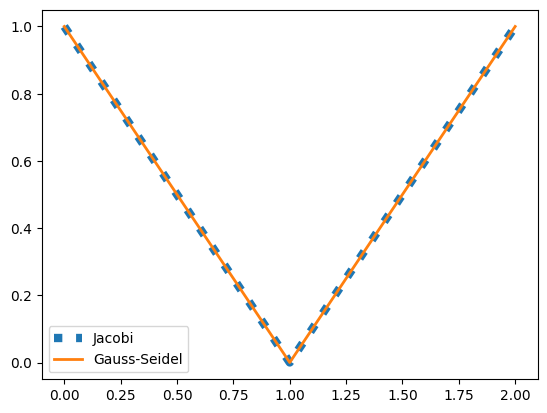

In [69]:
# Veamos qué pasa al variar omega
omegas = np.linspace(0.0, 2, 10000)
P_jac_inv = np.linalg.inv(P_jacobi)
P_gs_inv = np.linalg.inv(P_jacobi)
ops_jac = [np.linalg.svdvals(I - o * P_jac_inv * A).max() for o in omegas]
ops_gs = [np.linalg.svdvals(I - o * P_gs_inv * A).max() for o in omegas]
plt.plot(omegas, ops_jac, linestyle=":", linewidth=6, label="Jacobi")
plt.plot(omegas, ops_jac, linestyle="-", linewidth=2, label="Gauss-Seidel")
plt.legend()
plt.show()

# Recap 

- Aproximar objetos de dim infinita (funciones) a partir de dimensión finita (vectores)
- Computador tiene limitaciones
- Podemos aproximar gracias a Teorema de Taylor (funciones y ecuaciones)
- Aproximación de operador derivada: operador lineal (matriz)
- Podemos resolver sistemas lineales iterativamente